In [17]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [18]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [19]:
%%R

# My commonly used R imports

require('tidyverse')

In [20]:
%%R
 
# Import data with R
df <- read_csv('combinedwithcensus.csv', show_col_types = FALSE)
df

# A tibble: 2,542 × 139
   `Unnamed: 0` Borough   Borough/Citywide Off…¹ District School `School Name_x`
          <dbl> <chr>     <chr>                     <dbl> <chr>  <chr>          
 1            0 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 2            1 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 3            2 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 4            3 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 5            4 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 6            5 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 7            6 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 8            7 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
 9            8 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
10            9 Manhattan Manhattan                     1 01M020 P.S. 020 Anna …
# ℹ 

In [21]:
# Import data in python
mtcars = pd.read_csv('combinedwithcensus.csv')
mtcars.head()

,Unnamed: 0,Borough,Borough/Citywide Office (B/CO),District,School,School Name_x,School Category,Program,Language,Language (Translated),...,two_or_more_nonhispanic_estimate,hispanic_estimate,median_income_estimate,percent_white_nonhispanic_estimate,percent_black_nonhispanic_estimate,percent_native_nonhispanic_estimate,percent_asian_nonhispanic_estimate,percent_someother_nonhispanic_estimate,percent_two_or_more_nonhispanic_estimate,percent_hispanic_estimate
0,0.0,Manhattan,Manhattan,1.0,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,0.0,747.0,70057.0,0.546265,0.056094,0.0,0.138925,0.0,0.0,0.195806
1,1.0,Manhattan,Manhattan,1.0,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,0.0,747.0,70057.0,0.546265,0.056094,0.0,0.138925,0.0,0.0,0.195806
2,2.0,Manhattan,Manhattan,1.0,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,0.0,747.0,70057.0,0.546265,0.056094,0.0,0.138925,0.0,0.0,0.195806
3,3.0,Manhattan,Manhattan,1.0,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,0.0,747.0,70057.0,0.546265,0.056094,0.0,0.138925,0.0,0.0,0.195806
4,4.0,Manhattan,Manhattan,1.0,01M020,P.S. 020 Anna Silver,Elementary,Dual Language,Chinese,中文,...,0.0,747.0,70057.0,0.546265,0.056094,0.0,0.138925,0.0,0.0,0.195806


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 35 rows containing missing values (`geom_point()`). 



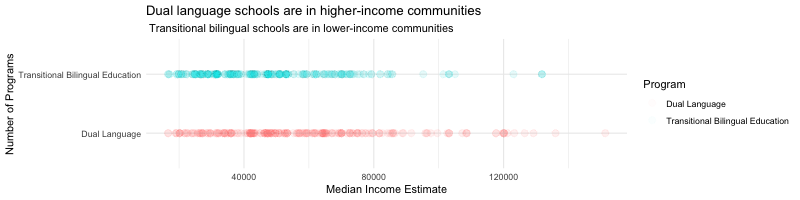

In [22]:
%%R -w 800 -h 200

library(ggplot2)

ggplot(df, aes(x = median_income_estimate, y = Program, color = Program)) +
    geom_point(alpha = 0.02, size = 3) +
    labs(x = "Median Income Estimate", y = "Number of Programs", subtitle = " Transitional bilingual schools are in lower-income communities") +
    ggtitle("Dual language schools are in higher-income communities") +
    theme_minimal()

In [23]:
%%R -o df

 #perform the t test with Program
t.test(median_income_estimate ~ Program, data = df)



	Welch Two Sample t-test

data:  median_income_estimate by Program
t = 9.7996, df = 2347.8, p-value < 2.2e-16
alternative hypothesis: true difference in means between group Dual Language and group Transitional Bilingual Education is not equal to 0
95 percent confidence interval:
  7595.102 11395.189
sample estimates:
                   mean in group Dual Language 
                                      57352.78 
mean in group Transitional Bilingual Education 
                                      47857.64 



In [34]:
%%R -o df

group1 <- subset(df, Program == "Dual Language")$percent_hispanic_estimate
group2 <- subset(df, Program == "Transitional Bilingual Education")$percent_hispanic_estimate

# Perform the t-test
t_test_result <- t.test(group1, group2)

# Print the results
print(t_test_result)



	Welch Two Sample t-test

data:  group1 and group2
t = -0.8958, df = 2517.5, p-value = 0.3704
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -0.02971693  0.01107974
sample estimates:
mean of x mean of y 
0.4488346 0.4581532 



R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 15 rows containing non-finite values (`stat_boxplot()`). 



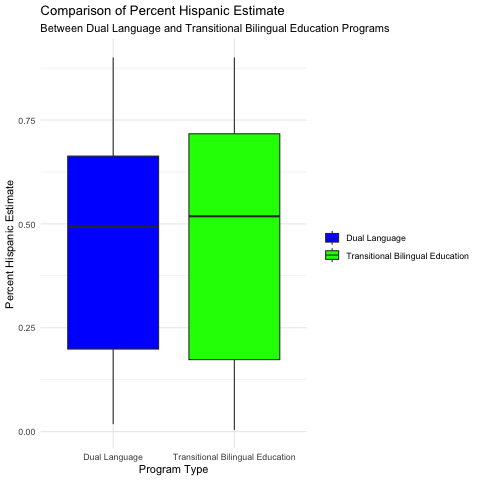

In [35]:
%%R

ggplot(df, aes(x = Program, y = percent_hispanic_estimate, fill = Program)) +
  geom_boxplot() +
  scale_fill_manual(values = c("Dual Language" = "blue", "Transitional Bilingual Education" = "green")) +
  labs(title = "Comparison of Percent Hispanic Estimate",
       subtitle = "Between Dual Language and Transitional Bilingual Education Programs",
       x = "Program Type",
       y = "Percent Hispanic Estimate") +
  theme_minimal() +
  theme(legend.title = element_blank())  # Hide the legend title if desired